Found 154 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Epoch 1/50
5/5 [==============================] - 22s 4s/step - loss: 1.6670 - accuracy: 0.5519 - val_loss: 1.5667 - val_accuracy: 0.9000
Epoch 2/50
5/5 [==============================] - 18s 3s/step - loss: 1.5587 - accuracy: 0.6429 - val_loss: 1.4412 - val_accuracy: 0.8750
Epoch 3/50
5/5 [==============================] - 19s 3s/step - loss: 1.4443 - accuracy: 0.7208 - val_loss: 1.2926 - val_accuracy: 1.0000
Epoch 4/50
5/5 [==============================] - 21s 4s/step - loss: 1.3307 - accuracy: 0.7987 - val_loss: 1.1473 - val_accuracy: 0.9500
Epoch 5/50
5/5 [==============================] - 20s 4s/step - loss: 1.2556 - accuracy: 0.7403 - val_loss: 1.0071 - val_accuracy: 0.9750
Epoch 6/50
5/5 [==============================] - 19s 4s/step - loss: 1.1913 - accuracy: 0.7338 - val_loss: 0.8995 - val_accuracy: 0.9750
Epoch 7/50
5/5 [==============================] - 19s 3s/step - loss: 1.1218 - accuracy: 0.

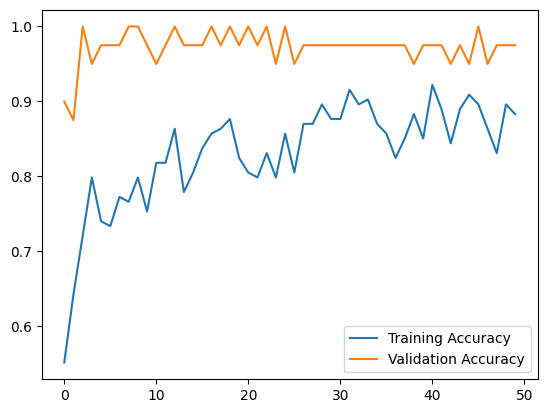

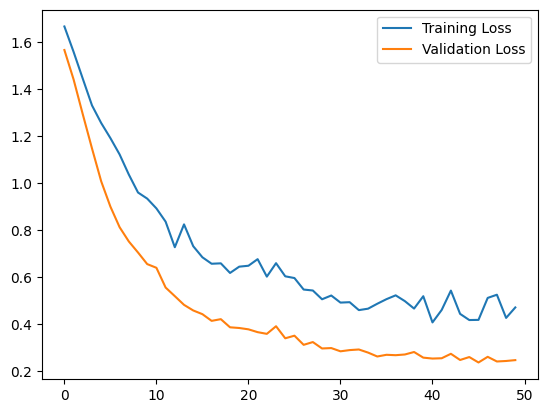

In [ ]:
import numpy as np
import pandas as pd
import os

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import shutil
import os

source = '/content/drive/MyDrive/Mendeley COVID CXR Images'
dest_train = '/content/drive/MyDrive/xray_dataset_covid19/train'
dest_test = '/content/drive/MyDrive/xray_dataset_covid19/test'

# Membuat folder untuk data pelatihan dan pengujian
os.makedirs(dest_train, exist_ok=True)
os.makedirs(dest_test, exist_ok=True)

# Memisahkan data menjadi data pelatihan dan pengujian (80% dan 20%)
train, test = train_test_split(os.listdir(source), train_size=0.8, test_size=0.2)

# Memindahkan data ke direktori pelatihan
for file in train:
    shutil.copy(os.path.join(source, file), os.path.join(dest_train, file))

# Memindahkan data ke direktori pengujian
for file in test:
    shutil.copy(os.path.join(source, file), os.path.join(dest_test, file))


train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

#Pembangunan Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),  # Tambahkan regularisasi L2
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


history = model.fit(train_generator, steps_per_epoch=len(train_generator), epochs=50, validation_data=test_generator, validation_steps=len(test_generator))

# Plot akurasi dan loss
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
test_loss, test_acc = model.evaluate(test_generator, steps=len(test_generator))
print('\nTest accuracy:', test_acc)

2/2 [==============================] - 2s 128ms/step - loss: 0.2455 - accuracy: 0.9750

Test accuracy: 0.9750000238418579


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Callback untuk menyimpan model terbaik berdasarkan val_accuracy
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, save_weights_only=False, monitor='val_accuracy', mode='max')

# Pelatihan model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=50,
    validation_data=test_generator,
    validation_steps=len(test_generator),
    callbacks=[model_checkpoint]
)


Epoch 1/50
5/5 [==============================] - ETA: 0s - loss: 0.4609 - accuracy: 0.8701

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


5/5 [==============================] - 24s 5s/step - loss: 0.4609 - accuracy: 0.8701 - val_loss: 0.2387 - val_accuracy: 0.9750
Epoch 2/50
5/5 [==============================] - 19s 4s/step - loss: 0.4797 - accuracy: 0.8571 - val_loss: 0.2454 - val_accuracy: 0.9750
Epoch 3/50
5/5 [==============================] - 25s 4s/step - loss: 0.3948 - accuracy: 0.8896 - val_loss: 0.2390 - val_accuracy: 0.9750
Epoch 4/50
5/5 [==============================] - 21s 4s/step - loss: 0.4799 - accuracy: 0.8701 - val_loss: 0.2452 - val_accuracy: 0.9750
Epoch 5/50
5/5 [==============================] - 19s 4s/step - loss: 0.4121 - accuracy: 0.9026 - val_loss: 0.2534 - val_accuracy: 0.9500
Epoch 6/50
5/5 [==============================] - 19s 4s/step - loss: 0.4356 - accuracy: 0.8961 - val_loss: 0.2300 - val_accuracy: 1.0000
Epoch 7/50
5/5 [==============================] - 20s 4s/step - loss: 0.4214 - accuracy: 0.8961 - val_loss: 0.2712 - val_accuracy: 0.9500
Epoch 8/50
5/5 [=============================

In [ ]:
# Muat model terbaik yang disimpan
saved_model = tf.keras.models.load_model('best_model.h5')
# Evaluasi model pada dataset pengujian
test_loss, test_accuracy = saved_model.evaluate(test_generator, steps=len(test_generator))

print(f'Test accuracy: {test_accuracy}')

2/2 [==============================] - 2s 132ms/step - loss: 0.2300 - accuracy: 1.0000
Test accuracy: 1.0


# Pneumonia

In [ ]:
import tensorflow as tf

sample_image_path = '/content/drive/MyDrive/xray_dataset_covid19/test/PNEUMONIA/SARS-10.1148rg.242035193-g04mr34g09a-Fig9a-day17.jpeg'
sample_image = tf.keras.preprocessing.image.load_img(sample_image_path, target_size=(224, 224))
sample_image = tf.keras.preprocessing.image.img_to_array(sample_image)
sample_image = sample_image / 255.0
sample_image = tf.expand_dims(sample_image, 0)
prediction = model.predict(sample_image)
print('Prediction:', prediction)

1/1 [==============================] - 0s 191ms/step
Prediction: [[0.8847767]]


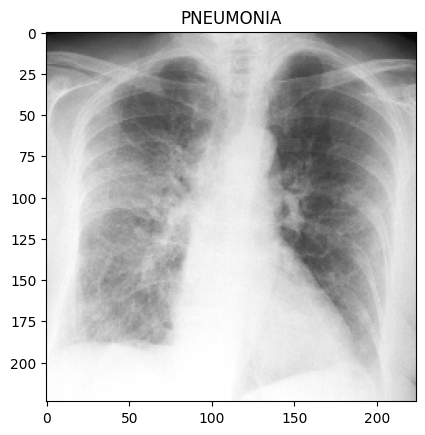

In [ ]:
plt.imshow(sample_image[0])
plt.title('PNEUMONIA' if prediction[0][0] > 0.5 else 'NORMAL')
plt.show()

# Normal


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

# Definisi base_model
base_model = MobileNetV2(weights='imagenet', include_top=False)

# Membuat model top untuk dikombinasikan dengan base_model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

# Gabungkan base_model dan top model
model = Model(inputs=base_model.input, outputs=predictions)


9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
sample_image_path = '/content/drive/MyDrive/xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0035-0001.jpeg'
sample_image = tf.keras.preprocessing.image.load_img(sample_image_path, target_size=(224, 224))
sample_image = tf.keras.preprocessing.image.img_to_array(sample_image)
sample_image = sample_image / 255.0
sample_image = tf.expand_dims(sample_image, 0)
prediction = model.predict(sample_image)
print('Prediction:', prediction)

1/1 [==============================] - 1s 1s/step
Prediction: [[0.4828953]]


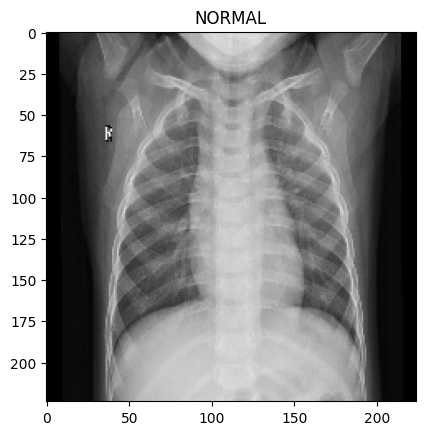

In [ ]:
plt.imshow(sample_image[0])
plt.title('PNEUMONIA' if prediction[0][0] > 0.5 else 'NORMAL')
plt.show()

* Nilai mendekati 0: Model yakin bahwa gambar tersebut tidak termasuk dalam kelas positif (Non-COVID-19).
* Nilai mendekati 1: Model yakin bahwa gambar tersebut termasuk dalam kelas positif (COVID-19).

# Pengujian Model

1/1 [==============================] - 0s 104ms/step


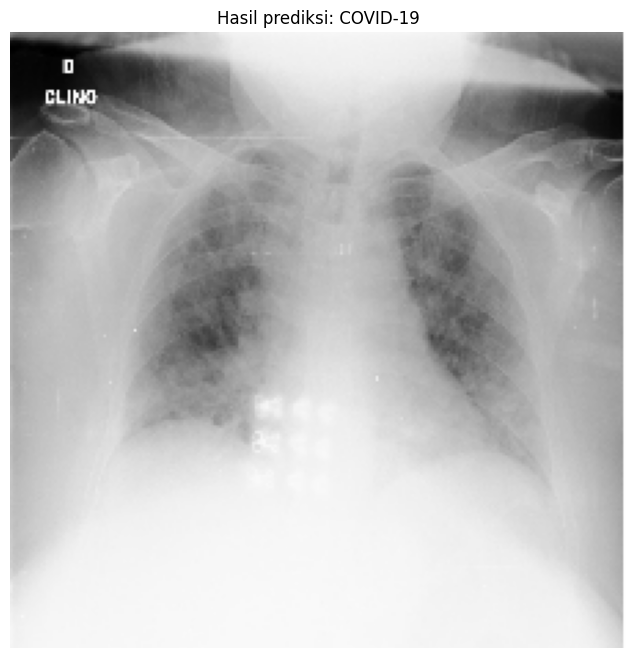

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt


model = tf.keras.models.load_model('best_model.h5')


image_path = '/content/drive/MyDrive/xray_dataset_covid19/train/PNEUMONIA/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg'

# Load dan preprocessing gambar
img = load_img(image_path, target_size=(224, 224))
img_array = img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Melakukan prediksi
predictions = model.predict(img_array)

# Interpretasi hasil prediksi
if predictions[0] > 0.5:
    prediction_label = "COVID-19"
else:
    prediction_label = "Non-COVID-19"

# Menampilkan gambar bersama dengan hasil prediksi
plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.title(f'Hasil prediksi: {prediction_label}')
plt.axis('off')
plt.show()
